In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from matplotlib.ticker import FuncFormatter
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
df_sf = pd.read_csv("data/sfh_ts.csv") # single family homes time series
df_ah = pd.read_csv("data/ahtt.csv") # All homes top tier


**Display Head**

In [3]:
df_sf.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,121531.336651,121738.651072,121995.876446,122548.308184,123184.186238,...,350593.674816,351419.563807,352981.682891,354901.213108,356405.219291,357054.866170,357269.495250,357556.470130,358047.728564,358695.400157
1,394913,1,"New York, NY",msa,NY,215526.347853,216437.299774,217353.388393,219206.206623,221115.123983,...,653024.167946,657325.710093,662976.463941,669457.862304,674379.010648,677580.634957,680209.743078,683834.502366,687956.181425,691747.775297
2,753899,2,"Los Angeles, CA",msa,CA,228840.318549,229713.653329,230850.552728,233116.339880,235575.321729,...,961240.278183,958067.128774,956942.083361,960982.286878,967579.982979,972048.452546,976772.555536,982347.195293,989199.485026,994897.480686
3,394463,3,"Chicago, IL",msa,IL,156308.333980,156460.092041,156739.556227,157434.724023,158265.478146,...,323407.920786,325014.621277,327666.811355,330756.679881,333074.201792,334422.582458,335234.282077,336199.561203,337340.532590,338506.114351
4,394514,4,"Dallas, TX",msa,TX,126045.193158,126100.940737,126169.731762,126344.177104,126568.833701,...,371215.184232,371698.224857,372852.439583,373826.243574,373978.341627,373322.949324,372396.923106,371759.173084,371580.012878,371494.296639


In [4]:
df_ah.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,102001,0,United States,country,NaN,236310.307821,236838.023959,237480.193801,238850.421544,240412.320519,...,6.617035e+05,6.627986e+05,6.656263e+05,6.696100e+05,6.731204e+05,6.746329e+05,6.752572e+05,6.759704e+05,6.773754e+05,6.789914e+05
1,394913,1,"New York, NY",msa,NY,422779.470763,424569.458990,426373.228624,430078.225391,433925.761544,...,1.040112e+06,1.044140e+06,1.051909e+06,1.061940e+06,1.070822e+06,1.075952e+06,1.079291e+06,1.083236e+06,1.087985e+06,1.091999e+06
2,753899,2,"Los Angeles, CA",msa,CA,408845.886049,410475.727683,412497.750632,416559.900109,420908.271857,...,1.538312e+06,1.531557e+06,1.529231e+06,1.535570e+06,1.546364e+06,1.551836e+06,1.557527e+06,1.564954e+06,1.576026e+06,1.585157e+06
3,394463,3,"Chicago, IL",msa,IL,294798.619006,295160.327624,295764.309500,297253.846121,298995.626064,...,5.029052e+05,5.050047e+05,5.087715e+05,5.132149e+05,5.164459e+05,5.179396e+05,5.185213e+05,5.194622e+05,5.209806e+05,5.227783e+05
4,394514,4,"Dallas, TX",msa,TX,234470.520983,234474.949985,234523.178926,234692.071349,234965.454079,...,6.038140e+05,6.057093e+05,6.088988e+05,6.120574e+05,6.134658e+05,6.129716e+05,6.114534e+05,6.104536e+05,6.104705e+05,6.112888e+05


**Display Tails**

In [5]:
df_sf.tail(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,125505.480365,124620.859170,124703.453283,126217.346418,127940.190271,129029.544547,129216.203575,128841.856015,128169.963134,127248.665154
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,411724.194103,411668.716287,413385.593811,415037.934548,416247.744981,416235.514828,415323.647956,415325.998281,416842.773776,419086.682223
892,753874,937,"Craig, CO",msa,CO,98830.861837,99097.911211,99574.805478,100259.229234,101040.616567,...,285287.949217,285219.875814,285685.290380,286463.285398,287357.918108,287698.710801,288033.677233,288266.115146,289594.833055,291259.120524
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,91184.718655,91281.020656,91975.182494,92739.898571,93395.868423,93641.985168,93402.487663,92893.101563,91612.695630,90013.700765
894,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,88711.311676,87596.741991,87637.262603,87847.018796,88770.521386,90064.663210,91903.350319,93542.740242,94253.311435,94265.128384


In [6]:
df_ah.tail(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,221914.095432,220287.910570,220192.537576,222203.281152,224501.537093,225784.071770,225948.532152,225991.175537,226064.814808,225879.321361
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,548360.287886,547769.478967,550368.767534,552969.820826,555076.306477,554859.636217,553466.035413,553438.132178,555357.238979,558374.377510
892,753874,937,"Craig, CO",msa,CO,171168.872755,171482.922883,171861.387668,172285.233625,172695.40665,...,394896.584283,393944.116716,394206.291399,395435.448506,397281.736381,398265.278118,399296.985077,400193.153531,402053.971208,404091.754361
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,179575.371395,180865.594222,182899.970265,184752.274354,185410.355676,185072.435743,184340.334684,183551.676624,182053.962201,180243.174764
894,394767,939,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,173196.777417,172352.641283,172959.096318,173663.574855,174270.220375,174816.753206,175129.003722,174897.405214,174250.740731,173417.359801


**Display Data Types**

In [7]:
display(df_sf.dtypes)
display(df_ah.dtypes)

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 303, dtype: object

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2024-06-30    float64
2024-07-31    float64
2024-08-31    float64
2024-09-30    float64
2024-10-31    float64
Length: 303, dtype: object

##### Summary Stats (Before Cleaning)

In [8]:
#summary stats for single family homes 
summary_stats_sf = round(df_sf.describe(),2).T
summary_stats_sf['median'] = df_sf.select_dtypes(include="number").median()
display(summary_stats_sf)

#summary stats for all homes
summary_stats_ah = round(df_ah.describe(),2).T
summary_stats_ah['median'] = df_ah.select_dtypes(include="number").median()
display(summary_stats_ah)



,count,mean,std,min,25%,50%,75%,max,median
RegionID,895.0,412099.67,78377.36,102001.00,394546.00,394795.00,395044.50,753929.00,394795.000000
SizeRank,895.0,461.75,268.71,0.00,230.50,460.00,689.50,939.00,460.000000
2000-01-31,431.0,109597.34,49895.66,36851.79,78185.15,97775.99,125991.30,381510.01,97775.993778
2000-02-29,432.0,109775.59,50019.98,36845.57,78410.14,97816.69,126160.71,383487.48,97816.690560
2000-03-31,433.0,109928.38,50225.08,36826.93,78460.09,97756.98,126169.73,386461.56,97756.981773
...,...,...,...,...,...,...,...,...,...
2024-06-30,895.0,287728.55,189263.01,48756.91,178181.36,234229.04,336033.58,1645860.75,234229.039751
2024-07-31,895.0,288079.63,189413.91,48614.10,177943.49,234848.41,336572.08,1662260.64,234848.413689
2024-08-31,895.0,288360.37,189662.75,48182.06,178290.90,235380.37,336977.42,1676799.48,235380.365960
2024-09-30,895.0,288691.94,190364.44,47853.60,177691.17,235428.29,337784.30,1690593.45,235428.292553


,count,mean,std,min,25%,50%,75%,max,median
RegionID,895.0,412099.67,78377.36,102001.00,394546.00,394795.00,395044.50,753929.00,394795.000000
SizeRank,895.0,461.75,268.71,0.00,230.50,460.00,689.50,939.00,460.000000
2000-01-31,434.0,203632.90,102135.63,95416.12,148273.67,178090.97,224173.26,970105.39,178090.968893
2000-02-29,435.0,203796.99,102419.43,95635.01,148168.28,177802.58,224258.97,973321.64,177802.575776
2000-03-31,435.0,204198.22,102901.06,95799.42,148496.99,178332.22,224207.14,976602.12,178332.218939
...,...,...,...,...,...,...,...,...,...
2024-06-30,895.0,464434.04,341893.69,121495.38,294779.26,374619.30,507816.07,3992887.20,374619.300186
2024-07-31,895.0,464853.22,341659.73,121593.58,295398.24,375477.02,507508.19,3946337.68,375477.016882
2024-08-31,895.0,465385.72,341713.81,119465.64,296309.47,375584.82,507914.21,3903833.33,375584.822849
2024-09-30,895.0,466305.36,343035.88,117556.25,296436.48,376949.60,507586.09,3895641.51,376949.602841


In [9]:
#single family homes
display(df_sf.select_dtypes(include = ['object']).describe().T)

#all homes
display(df_ah.select_dtypes(include = ['object']).describe().T)

,count,unique,top,freq
RegionName,895,895,"Lamesa, TX",1
RegionType,895,2,msa,894
StateName,894,50,TX,67


,count,unique,top,freq
RegionName,895,895,"Lamesa, TX",1
RegionType,895,2,msa,894
StateName,894,50,TX,67


##### Dropping Columns

In [10]:
#Single Family
df_sf = df_sf.drop(['RegionID', 'StateName'], axis=1)
display(df_sf.head(5))

#All Family
df_ah = df_ah.drop(['RegionID', 'StateName'], axis=1)
display(df_ah.head(5))

,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,0,United States,country,121531.336651,121738.651072,121995.876446,122548.308184,123184.186238,123865.680213,124586.279073,...,350593.674816,351419.563807,352981.682891,354901.213108,356405.219291,357054.866170,357269.495250,357556.470130,358047.728564,358695.400157
1,1,"New York, NY",msa,215526.347853,216437.299774,217353.388393,219206.206623,221115.123983,223259.025429,225613.438183,...,653024.167946,657325.710093,662976.463941,669457.862304,674379.010648,677580.634957,680209.743078,683834.502366,687956.181425,691747.775297
2,2,"Los Angeles, CA",msa,228840.318549,229713.653329,230850.552728,233116.339880,235575.321729,238017.327535,240515.010731,...,961240.278183,958067.128774,956942.083361,960982.286878,967579.982979,972048.452546,976772.555536,982347.195293,989199.485026,994897.480686
3,3,"Chicago, IL",msa,156308.333980,156460.092041,156739.556227,157434.724023,158265.478146,159199.059474,160194.910072,...,323407.920786,325014.621277,327666.811355,330756.679881,333074.201792,334422.582458,335234.282077,336199.561203,337340.532590,338506.114351
4,4,"Dallas, TX",msa,126045.193158,126100.940737,126169.731762,126344.177104,126568.833701,126796.407950,127030.425355,...,371215.184232,371698.224857,372852.439583,373826.243574,373978.341627,373322.949324,372396.923106,371759.173084,371580.012878,371494.296639


,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,...,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,0,United States,country,236310.307821,236838.023959,237480.193801,238850.421544,240412.320519,242092.423675,243880.472278,...,6.617035e+05,6.627986e+05,6.656263e+05,6.696100e+05,6.731204e+05,6.746329e+05,6.752572e+05,6.759704e+05,6.773754e+05,6.789914e+05
1,1,"New York, NY",msa,422779.470763,424569.458990,426373.228624,430078.225391,433925.761544,438227.180542,442864.842513,...,1.040112e+06,1.044140e+06,1.051909e+06,1.061940e+06,1.070822e+06,1.075952e+06,1.079291e+06,1.083236e+06,1.087985e+06,1.091999e+06
2,2,"Los Angeles, CA",msa,408845.886049,410475.727683,412497.750632,416559.900109,420908.271857,425224.082320,429611.845129,...,1.538312e+06,1.531557e+06,1.529231e+06,1.535570e+06,1.546364e+06,1.551836e+06,1.557527e+06,1.564954e+06,1.576026e+06,1.585157e+06
3,3,"Chicago, IL",msa,294798.619006,295160.327624,295764.309500,297253.846121,298995.626064,300909.949315,302873.303989,...,5.029052e+05,5.050047e+05,5.087715e+05,5.132149e+05,5.164459e+05,5.179396e+05,5.185213e+05,5.194622e+05,5.209806e+05,5.227783e+05
4,4,"Dallas, TX",msa,234470.520983,234474.949985,234523.178926,234692.071349,234965.454079,235196.340543,235446.078093,...,6.038140e+05,6.057093e+05,6.088988e+05,6.120574e+05,6.134658e+05,6.129716e+05,6.114534e+05,6.104536e+05,6.104705e+05,6.112888e+05


##### Dropping Rows

In [11]:
display(df_sf.shape)
display(df_ah.shape)

(895, 301)

(895, 301)

**Duplicates**

In [12]:
duplicate_rows_df_sf = df_sf[df_sf.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_sf.shape)

#All Homes
duplicate_rows_df_ah = df_ah[df_ah.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_ah.shape)

number of duplicate rows:  (0, 301)
number of duplicate rows:  (0, 301)


In [13]:
display(df_sf.count())
display(df_ah.count())

SizeRank      895
RegionName    895
RegionType    895
2000-01-31    431
2000-02-29    432
             ... 
2024-06-30    895
2024-07-31    895
2024-08-31    895
2024-09-30    895
2024-10-31    895
Length: 301, dtype: int64

SizeRank      895
RegionName    895
RegionType    895
2000-01-31    434
2000-02-29    435
             ... 
2024-06-30    895
2024-07-31    895
2024-08-31    895
2024-09-30    895
2024-10-31    895
Length: 301, dtype: int64

**Dropping the missing or null values**

In [14]:
display(df_sf.isnull().sum())
display(df_ah.isnull().sum())

SizeRank        0
RegionName      0
RegionType      0
2000-01-31    464
2000-02-29    463
             ... 
2024-06-30      0
2024-07-31      0
2024-08-31      0
2024-09-30      0
2024-10-31      0
Length: 301, dtype: int64

SizeRank        0
RegionName      0
RegionType      0
2000-01-31    461
2000-02-29    460
             ... 
2024-06-30      0
2024-07-31      0
2024-08-31      0
2024-09-30      0
2024-10-31      0
Length: 301, dtype: int64

In [15]:
df_sf = df_sf.dropna()    # Single Family Dropping the missing values.
display(df_sf.count())

df_ah = df_ah.dropna()    # All homes Dropping the missing values.
display(df_ah.count())

SizeRank      304
RegionName    304
RegionType    304
2000-01-31    304
2000-02-29    304
             ... 
2024-06-30    304
2024-07-31    304
2024-08-31    304
2024-09-30    304
2024-10-31    304
Length: 301, dtype: int64

SizeRank      294
RegionName    294
RegionType    294
2000-01-31    294
2000-02-29    294
             ... 
2024-06-30    294
2024-07-31    294
2024-08-31    294
2024-09-30    294
2024-10-31    294
Length: 301, dtype: int64

In [16]:
display(df_sf.isnull().sum())   # After dropping the values

display(df_ah.isnull().sum())   # After dropping the values

SizeRank      0
RegionName    0
RegionType    0
2000-01-31    0
2000-02-29    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 301, dtype: int64

SizeRank      0
RegionName    0
RegionType    0
2000-01-31    0
2000-02-29    0
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 301, dtype: int64

##### Discriptive Summary (After Cleaning)

In [17]:
# Single Family
summary_stats_sf = round(df_sf.describe(),2).T
summary_stats_sf['median'] = df_sf.select_dtypes(include="number").median()
display(summary_stats_sf)

# All Homes
summary_stats_ah = round(df_ah.describe(),2).T
summary_stats_ah['median'] = df_ah.select_dtypes(include="number").median()
display(summary_stats_ah)

,count,mean,std,min,25%,50%,75%,max,median
SizeRank,304.0,310.07,259.13,0.00,92.50,235.00,483.00,937.00,235.000000
2000-01-31,304.0,114078.90,49530.26,36851.79,82371.13,105175.54,132574.25,334439.71,105175.542272
2000-02-29,304.0,114268.09,49713.56,36845.57,82394.97,105307.95,132842.83,335864.02,105307.947015
2000-03-31,304.0,114510.33,49943.45,36826.93,82597.41,105491.53,133177.41,337099.14,105491.528912
2000-04-30,304.0,115038.54,50455.14,36787.18,82898.09,105843.50,133967.92,340525.83,105843.495645
...,...,...,...,...,...,...,...,...,...
2024-06-30,304.0,338190.58,209822.54,76188.32,198897.03,283346.24,406581.19,1528387.57,283346.237388
2024-07-31,304.0,338716.89,209953.08,75905.34,199345.08,283544.79,407222.79,1524473.70,283544.792318
2024-08-31,304.0,339093.67,210123.08,75475.55,199535.01,283458.33,406944.58,1521816.70,283458.331007
2024-09-30,304.0,339494.82,210669.96,74779.48,199818.11,283333.63,406345.50,1525980.07,283333.632826


,count,mean,std,min,25%,50%,75%,max,median
SizeRank,294.0,309.70,257.78,0.00,93.50,233.50,484.00,937.00,233.500000
2000-01-31,294.0,210105.17,101389.93,95416.12,152785.71,187682.93,237762.19,970105.39,187682.928087
2000-02-29,294.0,210452.52,101759.45,95635.01,152929.68,187810.65,237704.45,973321.64,187810.652712
2000-03-31,294.0,210877.24,102238.19,95799.42,153070.92,188286.91,237992.36,976602.12,188286.908980
2000-04-30,294.0,211818.90,103297.96,96110.36,153375.08,188522.59,238718.66,983480.39,188522.593276
...,...,...,...,...,...,...,...,...,...
2024-06-30,294.0,537186.98,379031.18,167212.28,326034.15,430009.24,608295.49,3536781.02,430009.242237
2024-07-31,294.0,537763.20,379540.54,166924.28,326254.15,430021.30,608690.47,3568441.44,430021.302055
2024-08-31,294.0,538300.61,380290.23,166656.66,326698.27,430498.38,609551.55,3604391.44,430498.380168
2024-09-30,294.0,539252.08,382036.42,166643.84,326815.24,431027.34,610259.84,3643855.59,431027.336086


In [18]:
#Single Family
display(df_sf.select_dtypes(include = ['object']).describe().T)

#All Homes
display(df_ah.select_dtypes(include = ['object']).describe().T)

,count,unique,top,freq
RegionName,304,304,"Van Wert, OH",1
RegionType,304,2,msa,303


,count,unique,top,freq
RegionName,294,294,"Craig, CO",1
RegionType,294,2,msa,293


##### Melting Data

In [19]:
#single family
melted_df_sf = df_sf.melt(
    id_vars=["SizeRank", "RegionName", "RegionType"], 
    var_name="Date", 
    value_name="Value"
)

#all homes

melted_df_ah = df_ah.melt(
    id_vars=["SizeRank", "RegionName", "RegionType"], 
    var_name="Date", 
    value_name="Value"
)

# Convert single family homes Date to datetime
melted_df_sf["Date"] = pd.to_datetime(melted_df_sf["Date"])

# Convert all homes Date to datetime
melted_df_ah["Date"] = pd.to_datetime(melted_df_ah["Date"])

display(melted_df_sf)
display(melted_df_ah)



,SizeRank,RegionName,RegionType,Date,Value
0,0,United States,country,2000-01-31,1.215313e+05
1,1,"New York, NY",msa,2000-01-31,2.155263e+05
2,2,"Los Angeles, CA",msa,2000-01-31,2.288403e+05
3,3,"Chicago, IL",msa,2000-01-31,1.563083e+05
4,5,"Houston, TX",msa,2000-01-31,1.225664e+05
...,...,...,...,...,...
90587,896,"Arkadelphia, AR",msa,2024-10-31,1.476952e+05
90588,905,"Cordele, GA",msa,2024-10-31,1.283180e+05
90589,910,"Vineyard Haven, MA",msa,2024-10-31,1.528034e+06
90590,923,"Fitzgerald, GA",msa,2024-10-31,1.143412e+05


,SizeRank,RegionName,RegionType,Date,Value
0,0,United States,country,2000-01-31,2.363103e+05
1,1,"New York, NY",msa,2000-01-31,4.227795e+05
2,2,"Los Angeles, CA",msa,2000-01-31,4.088459e+05
3,3,"Chicago, IL",msa,2000-01-31,2.947986e+05
4,5,"Houston, TX",msa,2000-01-31,2.347544e+05
...,...,...,...,...,...
87607,896,"Arkadelphia, AR",msa,2024-10-31,2.519211e+05
87608,905,"Cordele, GA",msa,2024-10-31,3.174867e+05
87609,910,"Vineyard Haven, MA",msa,2024-10-31,2.945909e+06
87610,923,"Fitzgerald, GA",msa,2024-10-31,2.132366e+05


**Trend by median**

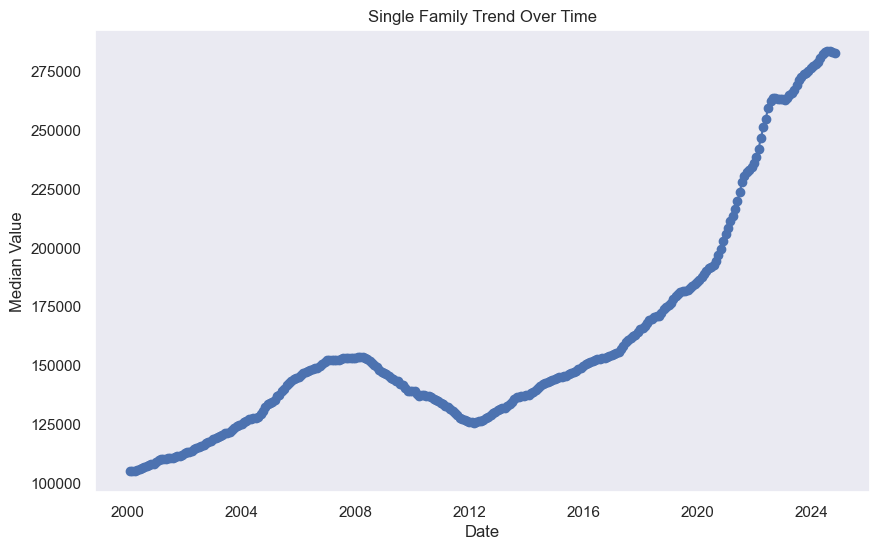

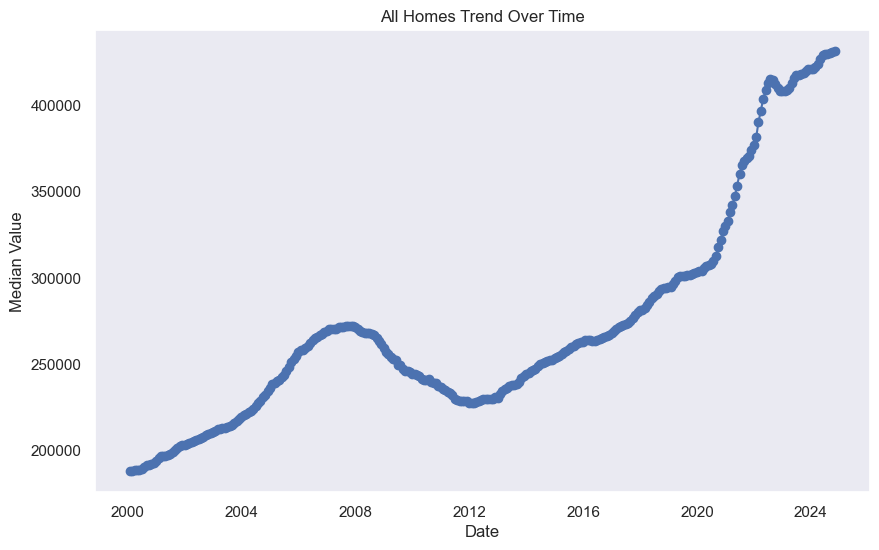

In [20]:
# Group by Date and calculate the mean (or any other metric)
trend_df_sf = melted_df_sf.groupby("Date")["Value"].median().reset_index() #single family
trend_df_ah = melted_df_ah.groupby("Date")["Value"].median().reset_index() #all homes


#plot single family
plt.figure(figsize=(10, 6))
plt.plot(trend_df_sf["Date"], trend_df_sf["Value"], marker="o", linestyle="-")
plt.title("Single Family Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Median Value")
plt.grid()
plt.show()

#plot all homes
plt.figure(figsize=(10, 6))
plt.plot(trend_df_ah["Date"], trend_df_ah["Value"], marker="o", linestyle="-")
plt.title("All Homes Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Median Value")
plt.grid()
plt.show()

**Trend by mean**

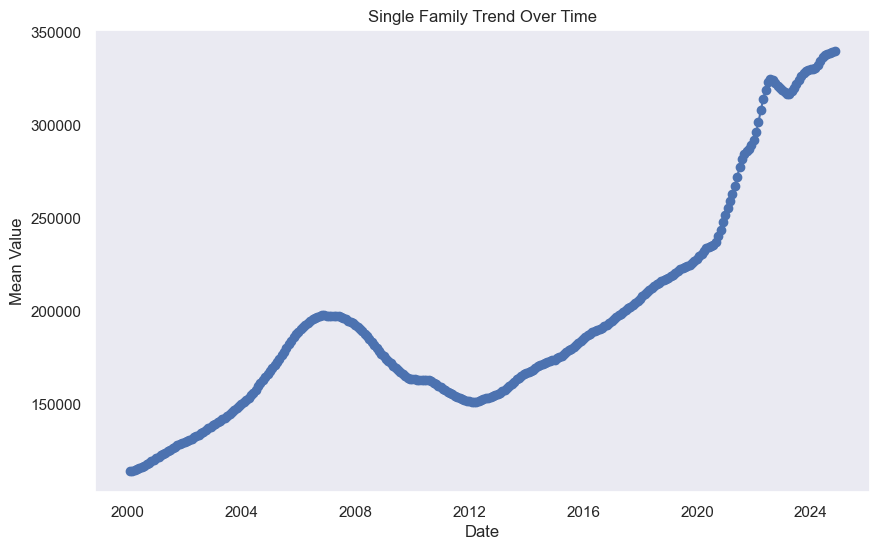

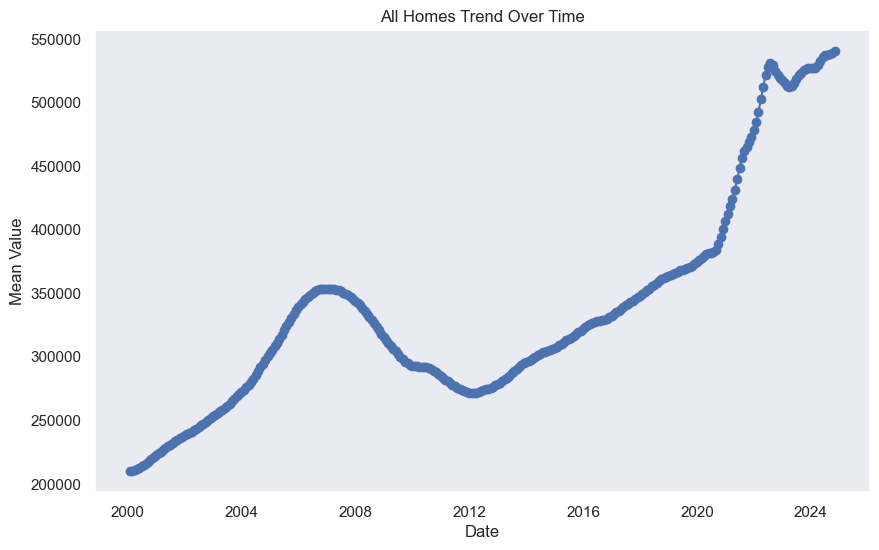

In [21]:
# Group by Date and calculate the mean (or any other metric)
trend_df_sf = melted_df_sf.groupby("Date")["Value"].mean().reset_index() #single family
trend_df_ah = melted_df_ah.groupby("Date")["Value"].mean().reset_index() #all homes


#plot single family
plt.figure(figsize=(10, 6))
plt.plot(trend_df_sf["Date"], trend_df_sf["Value"], marker="o", linestyle="-")
plt.title("Single Family Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Value")
plt.grid()
plt.show()

#plot all homes
plt.figure(figsize=(10, 6))
plt.plot(trend_df_ah["Date"], trend_df_ah["Value"], marker="o", linestyle="-")
plt.title("All Homes Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Mean Value")
plt.grid()
plt.show()

**Trend by sum**

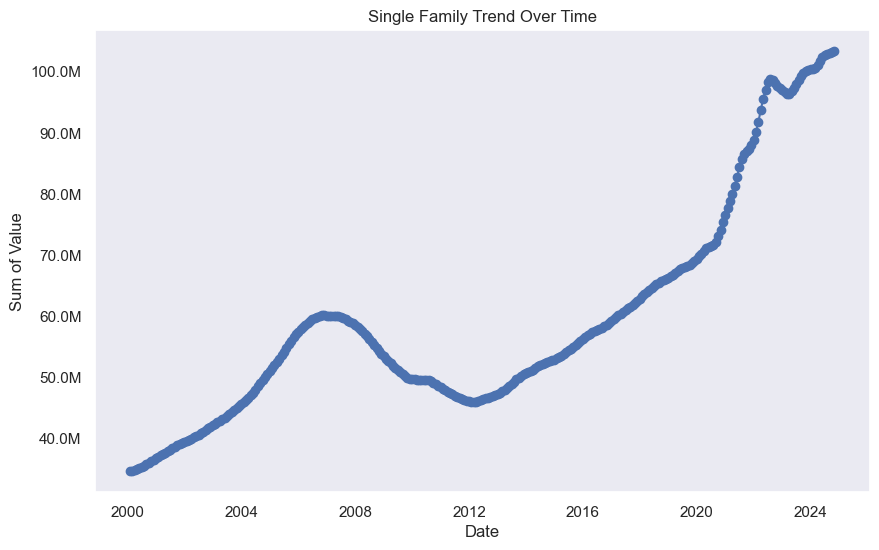

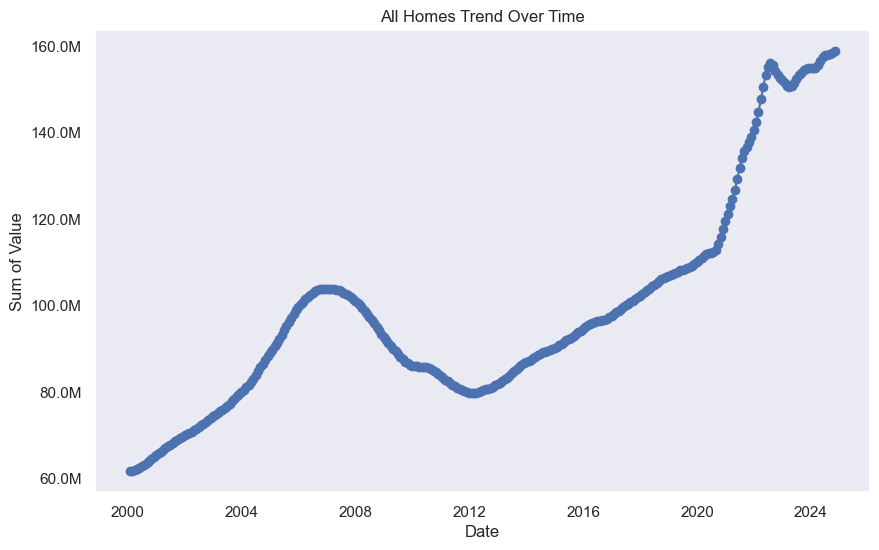

In [22]:
# Function to format large numbers
def format_y_axis(value, _):
    if value >= 1e6:  # If value is in millions
        return f"{value / 1e6:.1f}M"
    elif value >= 1e3:  # If value is in thousands
        return f"{value / 1e3:.1f}K"
    else:  # If value is less than 1,000
        return f"{int(value)}"


# Group by Date and calculate the mean (or any other metric)
trend_df_sf = melted_df_sf.groupby("Date")["Value"].sum().reset_index() #single family
trend_df_ah = melted_df_ah.groupby("Date")["Value"].sum().reset_index() #all homes


#plot single family
plt.figure(figsize=(10, 6))
plt.plot(trend_df_sf["Date"], trend_df_sf["Value"], marker="o", linestyle="-")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
plt.title("Single Family Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sum of Value")
plt.grid()
plt.show()

#plot all homes
plt.figure(figsize=(10, 6))
plt.plot(trend_df_ah["Date"], trend_df_ah["Value"], marker="o", linestyle="-")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))
plt.title("All Homes Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sum of Value")
plt.grid()
plt.show()
